## Test of fields space (x,y) distributions

In this notebook we want to show for the modes TE10, TE20, TE01, TE11, TM11 in a rectangular metallic waveguide:

1. What are the fields distribution that we would get from the TME code. Here I would say I do not want to normalize the fields to get an idea of the values that we are computing and if they are close to numerical precision.

2. We want to compare these abs field distribution with analytical formulations.

In [1]:
# Importing packages
import anwg # My package

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.optimize import fsolve
from scipy.signal import find_peaks
import scipy.constants as sc

# Plot in separate window
%matplotlib inline

ANWG v0.0.1


In [2]:
labels = ["Ex", "Ey", "Ez", "Hx", "Hy", "Hz"]

# Parameters of the waveguide
freq = 10e9 # Hz, for the TE10 mode
a=22.86e-3
b=10.16e-3

WR90 = anwg.Waveguide(a=a, b=b, zz=0, zt=0, sigma=58e6)
Dispersion_WR90 = anwg.DispersionCurve(waveguide=WR90, m=0, n=1, freq=freq)
Fields_WR90 = anwg.Fields(waveguide=WR90, dispersionCurve=Dispersion_WR90, Nx=100, Ny=100)

Fields_WR90.compute_fields()

A = [Fields_WR90.Ex, Fields_WR90.Ey, Fields_WR90.Ez, 
    Fields_WR90.Hx, Fields_WR90.Hy, Fields_WR90.Hz]
norm_factor_A = np.amax(np.amax(np.abs(A)))

WR90 = anwg.Waveguide(a=a, b=b, zz=0, zt=0, sigma=58e6)
Dispersion_WR90 = anwg.DispersionCurve(waveguide=WR90, m=0, n=1, freq=freq)
Fields_WR90 = anwg.Fields(waveguide=WR90, dispersionCurve=Dispersion_WR90, Nx=100, Ny=100)

Fields_WR90.compute_fields_analytical(mode='TE')

B = [Fields_WR90.Ex, Fields_WR90.Ey, Fields_WR90.Ez, 
    Fields_WR90.Hx, Fields_WR90.Hy, Fields_WR90.Hz]
norm_factor_B = np.amax(np.amax(np.abs(B)))

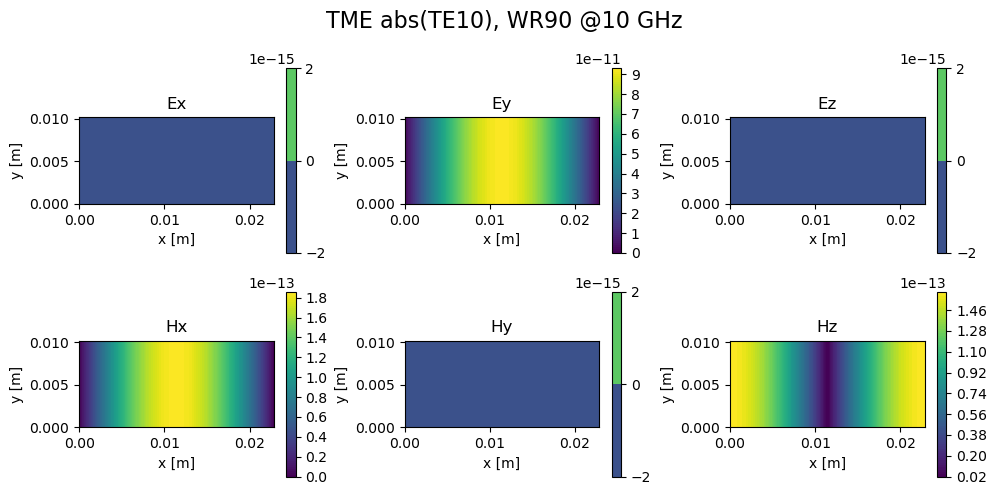

In [3]:
# Plotting TME
fig, ax = plt.subplots(2,3, figsize=(10, 5))

for idx, el in enumerate(labels):
    row = idx // 3  # Determine the row (0 or 1)
    col = idx % 3   # Determine the column (0, 1, or 2)

    contour = ax[row, col].contourf(Fields_WR90.x, Fields_WR90.y, np.abs(A[idx]), cmap='viridis', levels=100)
    fig.colorbar(contour, ax=ax[row, col])

    # Add labels and title
    ax[row, col].set_xlabel('x [m]')
    ax[row, col].set_ylabel('y [m]')
    ax[row, col].set_title(el)

    ax[row, col].set_aspect('equal')

# Set a title for the whole figure
fig.suptitle(f'TME abs(TE{1}{0}), WR90 @{10} GHz', fontsize=16)
# Show the plot
plt.tight_layout()

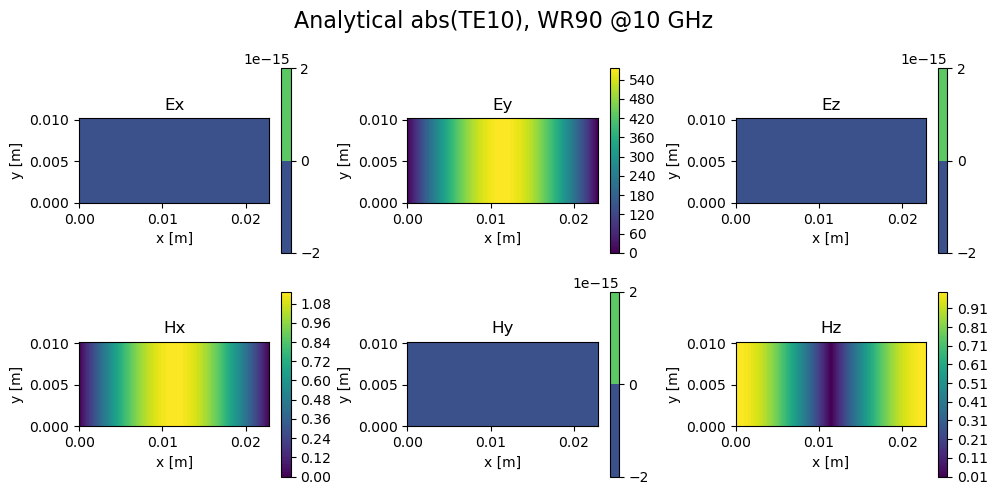

In [4]:
# Plotting analytical results
fig, ax = plt.subplots(2,3, figsize=(10, 5))

for idx, el in enumerate(labels):
    row = idx // 3  # Determine the row (0 or 1)
    col = idx % 3   # Determine the column (0, 1, or 2)

    contour = ax[row, col].contourf(Fields_WR90.x, Fields_WR90.y, np.abs(B[idx]), cmap='viridis', levels=100)
    fig.colorbar(contour, ax=ax[row, col])

    # Add labels and title
    ax[row, col].set_xlabel('x [m]')
    ax[row, col].set_ylabel('y [m]')
    ax[row, col].set_title(el)

    ax[row, col].set_aspect('equal')

# Set a title for the whole figure
fig.suptitle(f'Analytical abs(TE{1}{0}), WR90 @{10} GHz', fontsize=16)
# Show the plot
plt.tight_layout()


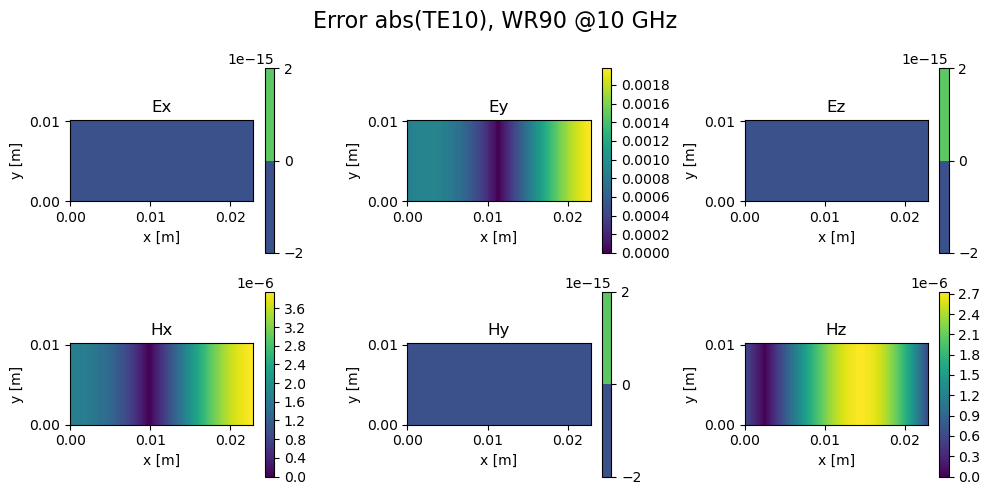

In [5]:
# Plotting TME
fig, ax = plt.subplots(2,3, figsize=(10, 5))

for idx, el in enumerate(labels):
    row = idx // 3  # Determine the row (0 or 1)
    col = idx % 3   # Determine the column (0, 1, or 2)

    contour = ax[row, col].contourf(Fields_WR90.x, Fields_WR90.y, np.abs(np.abs(A[idx])/norm_factor_A - np.abs(B[idx])/norm_factor_B), cmap='viridis', levels=100)
    fig.colorbar(contour, ax=ax[row, col])

    # Add labels and title
    ax[row, col].set_xlabel('x [m]')
    ax[row, col].set_ylabel('y [m]')
    ax[row, col].set_title(el)

    ax[row, col].set_aspect('equal')

# Set a title for the whole figure
fig.suptitle(f'Error abs(TE{1}{0}), WR90 @{10} GHz', fontsize=16)
# Show the plot
plt.tight_layout()

## Field distribution with Impedance walls
What would happen to the field distribution when inserting an impedance wall?

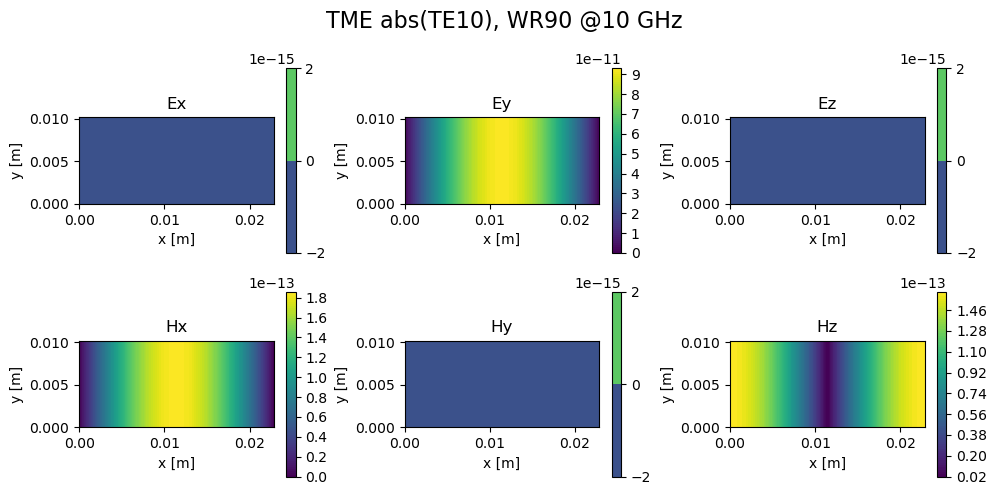

In [26]:
labels = ["Ex", "Ey", "Ez", "Hx", "Hy", "Hz"]

# Parameters of the waveguide
freq = 10e9 # Hz, for the TE10 mode
a=22.86e-3
b=10.16e-3

WR90 = anwg.Waveguide(a=a, b=b, zz=0, zt=0, sigma=58e6)
Dispersion_WR90 = anwg.DispersionCurve(waveguide=WR90, m=0, n=1, freq=freq)
Fields_WR90 = anwg.Fields(waveguide=WR90, dispersionCurve=Dispersion_WR90, Nx=100, Ny=100)

Fields_WR90.compute_fields()

A = [Fields_WR90.Ex, Fields_WR90.Ey, Fields_WR90.Ez, 
    Fields_WR90.Hx, Fields_WR90.Hy, Fields_WR90.Hz]
norm_factor_A = np.amax(np.amax(np.abs(A)))

# Plotting TME
fig, ax = plt.subplots(2,3, figsize=(10, 5))

for idx, el in enumerate(labels):
    row = idx // 3  # Determine the row (0 or 1)
    col = idx % 3   # Determine the column (0, 1, or 2)

    contour = ax[row, col].contourf(Fields_WR90.x, Fields_WR90.y, np.abs(A[idx]), cmap='viridis', levels=100)
    fig.colorbar(contour, ax=ax[row, col])

    # Add labels and title
    ax[row, col].set_xlabel('x [m]')
    ax[row, col].set_ylabel('y [m]')
    ax[row, col].set_title(el)

    ax[row, col].set_aspect('equal')

# Set a title for the whole figure
fig.suptitle(f'TME abs(TE{1}{0}), WR90 @{10} GHz', fontsize=16)
# Show the plot
plt.tight_layout()